# Deep Learning вопросы

<img src='img/tri.jpg' width=500>

### Оглавление

`Глубокое обучение`
- [Что такое глубокое обучение, и в чем его отличие от традиционного машинного обучения?](#1)
- [Как работает нейрон в искусственной нейронной сети (принцип работы)?](#2)
- [Функции активации в нейронных сетях](#3)
- [Переобучение (Overfitting) и Недообучение (Underfitting)](#4)
- [Градиентный спуск](#5)
- [Какова роль функции потерь в обучении нейронной сети? Примеры функций потерь для задач NLP.](#6)
- [Регуляризация](#7)
- [Исчезающие и взрывающиеся градиенты в нейронных сетях](#8)
- [Дисбаланс классов в задаче классификации текста](#9)

`Предобработка текста`
- [Токенизация](#10)
- [Subword-методы (Byte Pair Encoding, SentencePiece, WordPiece)](#11)
- [N-граммы](#12)
- [Bag of Words (BoW) и TF-iDF.](#13)
- [Эмбеддинги слов](#14)
- [Word2Vec](#15)
- [GloVe](#16)

`Архитектуры`
- [Архитектуры нейронных сетей](#17)
- [Рекуррентные нейронные сети (RNN)](#18)
- [LSTM и GRU](#19)
- [Механизм внимания (Attention)](#20)
- [Трансформеры](#21)
- [Подходы обработки длинных последовательностей в трансформерах](#22)
- [Маскированное языковое моделирование (Masked LM).](#23)
- [Архитектура BERT](#24)
- [Seq2Seq модели](#25)
- [Transfer learning](#26)
- [Интерпретация предсказания глубоких моделей в задачах NLP](#27)
- [Метрики в задачах NLP](#28)


___
### <a id=1>Глубокое обучение (Deep Learning)</a>

`Глубокое обучение` — это подмножество машинного обучения, основанное на использовании многослойных искусственных нейронных сетей для решения сложных задач, таких как обработка изображений, текста, речи и других типов данных. Оно автоматизирует процесс извлечения признаков (feature extraction) из данных.

|Аспект|	Машинное обучение	|Глубокое обучение|
|-|-|-|
|Извлечение признаков	|Ручное извлечение признаков (Feature Engineering).|	Автоматическое извлечение признаков.|
|Объем данных	|Хорошо работает на небольших наборах данных.	|Требует больших объемов данных для хорошей работы.|
|Сложность модели	|Простые модели (например, линейная регрессия, SVM).	|Глубокие нейронные сети с большим количеством параметров.|
|Зависимость от доменной экспертизы	|Требует экспертов для определения значимых признаков.	|Уменьшает зависимость от экспертизы.|
|Вычислительные ресурсы	|Относительно низкие требования к вычислительным мощностям.|	Высокая потребность в GPU/TPU и больших ресурсах.|
|Примеры алгоритмов	|Линейная регрессия, SVM, Random Forest, KNN.	|CNN, RNN, Transformers, BERT, GPT.|

___
###  <a id=2>Как работает нейрон в искусственной нейронной сети </a>

- Каждый нейрон получает несколько входов
- Каждое входное значение умножается на соответствующий вес, который определяет важность данного входа.
- Вес изменяется в процессе обучения нейронной сети, чтобы минимизировать ошибку

$\boxed{z = \sum{w \cdot x_i + b }}$
- Взвешенная сумма входов $z$ передается через активационную функцию, которая вводит нелинейность в модель, что позволяет нейронной сети решать сложные задачи.

    - $\boxed{ReLU = max(0, z)}$

    - $\boxed{Sigmoid = \frac{1}{1 + e^{-z}}}$
    - $\boxed{Tanh  = \frac{e^{z} - e^{-z}}{e^{z} + e^{-z}}}$

- Выходы нейронов текущего слоя становятся входами для следующего слоя.
- В процессе обучения веса обновляются с помощью метода обратного распространения ошибки (backpropagation).

___
###  <a id=3>Функции активации в нейронных сетях </a>

`Функции активации` используются для введения нелинейности в нейронные сети, они преобразуют входной сигнал (взвешенную сумму входов) в выходное значение, которое передается дальше по сети. Выбор функции активации влияет на производительность модели, ее скорость обучения и способность решать разные задачи.

$\boxed{ReLU = max(0, z)}$

- Преимущества
    - Простота и эффективность в вычислениях.
    - Быстрая сходимость при обучении глубоких сетей.
    - Сохраняет линейность для положительных значений.
- Недостатки
    - Если вес нейрона приводит к z<0, выход всегда будет 0, и этот нейрон может перестать обновляться.

$\boxed{Sigmoid = \frac{1}{1 + e^{-z}}}$
- Преимущества
    - Хорошо подходит для задач бинарной классификации (на выходе вероятность принадлежности к классу)
- Недостатки
    - При больших или малых значениях z, производная становится близкой к 0, что замедляет обучение.
        - $\boxed{\sigma'(z) = \sigma(z) \cdot (1 - \sigma(z))}$, При значениях z 0 и 1 градиент = 0
    - Среднее значение выхода не равно 0, что усложняет обучение

$\boxed{Tanh  = \frac{e^{z} - e^{-z}}{e^{z} + e^{-z}}}$

- Преимущества
    - Более широкий диапазон значений, чем у Sigmoid [-1, 1]
    - Среднее значение выхода равно 0, что улучшает обучение
- Недостатки
    - Страдает от проблемы исчезающего градиента при больших значениях 𝑧
        - $\boxed{Tanh'(z) = 1 - Tanh^2(z)}$, При значениях z 1 и -1 градиент = 0

$\boxed{GeLU(x) = x \cdot \Phi(x)}$
- $\Phi(x)$ : комулятивная функция распределения нормального гауссовского распределения
- GeLU похож на ReLU, но с более плавным переходом в области x < 0

$\boxed{SiLU(x) = x \cdot \sigma(x)}$
- для отрицательных входов сохраняется небольшая градиентная информация

___
###  <a id=4>Переобучение (Overfitting) и Недообучение (Underfitting) </a>

`Переобучение` возникает, когда модель слишком хорошо адаптируется к тренировочным данным и теряет способность обобщать информацию на новых, ранее не виденных данных. Модель "запоминает" данные, включая шум и случайные отклонения, вместо того чтобы находить общие закономерности.

`Признаки переобучения`:
- Высокая точность на тренировочной выборке и низкая на тестовой

`Причины переобучения`:
- Слишком сложная модель
- Недостаточный объем данных.
- Отсутствие регуляризации
- Слишком долгое обучение модели.

`Методы борьбы с переобучением:`
- Увеличение данных
- Аугментация данных
- Добавление штрафа за слишком большие веса в функции потерь (регуляризация)
- Использование dropout
- Уменьшение количества слоев или нейронов
- Использование меньшего числа параметров
- Прекращение обучения, когда ошибка на валидационной выборке начинает расти
- Кросс-валидация

`Недообучение` возникает, когда модель не может выявить зависимости даже в тренировочных данных, из-за чего её предсказания остаются неточными как на тренировочной, так и на тестовой выборках.

`Признаки недообучения`:
- Низкая точность как на тренировочной, так и на тестовой выборке.
- Ошибка практически не уменьшается при увеличении количества итераций обучения.
Причины недообучения:
- Слишком простая модель
- Недостаточное количество эпох обучения
- Неподходящая архитектура или функции активации
- Плохая подготовка данных

`Методы борьбы с недообучением:`
- Добавление новых слоев или нейронов
- Использование более сложной архитектуры
- Увеличение количества эпох
- Настройка параметров обучения, таких как скорость обучения (learning rate), оптимизатор, размер батча
- Улучшение качества данных

___
###  <a id=5>Градиентный спуск </a>

`Градиентный спуск` — это оптимизационный алгоритм, используемый для минимизации функции потерь в процессе обучения нейронной сети. Его цель — найти такие параметры модели (веса и смещения), которые обеспечивают минимальную ошибку предсказаний модели на тренировочных данных.

- Функция потерь (Loss Function): Определяет, насколько сильно предсказания модели отличаются от реальных значений.
- Градиент: Показывает направление наибольшего увеличения функции потерь. Для минимизации мы движемся в противоположном направлении.
- Шаг обновления параметров: $\boxed{x_1 - \gamma_i \cdot grad}$

Виды градиентного спуска:
- Полный градиентный спуск (`Batch Gradient Descent`): Использует все тренировочные данные для вычисления градиента на каждом шаге.
    - Точный расчет градиента
    - Долгое время обучения на больших данных.
    - Высокие затраты памяти

- Стохастический градиентный спуск (`SGD`): Обновляет параметры на основе одного случайного примера из тренировочных данных на каждом шаге.
    - Быстрее вычисляется на больших данных
    - Cлучайность помогает избежать локальных минимумов.
    - Может колебаться вокруг оптимального решения
    - Высокая дисперсия в направлении обновлений

- `Мини-батч` градиентный спуск: Делит данные на небольшие группы (батчи) и вычисляет градиент на основе одного батча
    - Компромисс между точностью и скоростью
    - Эффективно работает на больших данных
    - Требует настройки размера батча.

- `Momentum`: добавляет инерцию к обновлению параметров, чтобы ускорить обучение
    - Помогает пересекать плато и ускоряет сходимость

    - $\boxed{x_{i+1} = x_i - \gamma_i \cdot grad + \alpha \cdot \triangle x_i}$, где
        - $\triangle x_i = x_i - x_{i-1}$
        - $\alpha \in [0,1]$ : выбранное некоторое число (`постоянная импульса`) 
- `RMSProp` (Root Mean Square Propagation): Использует скользящее среднее квадратов градиентов для адаптации скорости обучения.
    - Хорошо работает для задач с разреженными признаками. 

    - $\boxed{x_{i+1} = x_i - \frac{\gamma_i}{\sqrt{m}} \cdot grad}$, где
        - $m = \beta \cdot g + (1 - \beta) \cdot g^2$: Скользящее среднее квадратов градиентов
- `Adam` (Adaptive Moment Estimation): Комбинирует идеи RMSProp и Momentum
    - Быстрая сходимость.
    - Может приводить к переобучению, если плохо настроены гиперпараметры
    - $\boxed{x_{i+1} = x_i - \frac{\gamma_i}{\sqrt{m}} \cdot v}$, где
        - $m = \beta_1 \cdot g + (1 - \beta_1) \cdot g^2$: Скользящее среднее квадратов градиентов
        - $v = \beta_2 \cdot g + (1 - \beta_2) \cdot g$: Скользящее среднее квадратов градиентов


___
###  <a id=6>Функция потерь в обучении нейронной сети </a>

`Функция потерь` (Loss Function) - функция, которая дает численную оценку качества предсказаний модели, чтобы алгоритм оптимизации (например, градиентный спуск) мог минимизировать эту ошибку.
- После каждого прохода данных через сеть функция потерь вычисляет ошибку между реальными и предсказанными значениями.
- Градиент функции потерь используется для обновления параметров модели с целью минимизации этой ошибки.

Функции потерь

- `Кросс-энтропия` (Cross-Entropy Loss): Используется, когда цель — предсказать вероятность для одного из нескольких классов.

    - $\boxed{L = -\frac{1}{N}\sum^N \sum^K y_{i, k} \cdot log(\hat{y}_{i, k})}$
    - Классификация тональности текста 
    - Категоризация документов
- `Перекрестная энтропия с маскированием`: Используется для задач, где длина последовательностей может различаться (например, Seq2Seq модели)
     - $\boxed{L = -\frac{1}{N}\sum^N \sum^T m_{i,t} \cdot y_{i, t} \cdot log(\hat{y}_{i, t})}$
        - $m_{i,t}$: маска (равна 1 для реальных токенов, 0 для паддинга)
    - Перевод текста
    - Генерация текста (например, автозаполнение).

- `Негативное логарифмическое правдоподобие` (Negative Log-Likelihood, NLL): Используется в языковых моделях, чтобы минимизировать вероятность ошибок в предсказании следующего слова.
    - $\boxed{L = -\frac{1}{N}\sum^N log(y_i | x_i)}$
    - Предсказание следующего слова в предложении.
- `Контрастивная потеря` (Contrastive Loss): Применяется для обучения моделей, которые работают с эмбеддингами текста
    - $\boxed{L = (1 - y) \cdot max(0, m-d)^2 + y\cdot d^2}$
        - $d$: расстояние между эмбеддингами
        - $m$: пороговое значение
        - $y$: истинное значение `пары векторов`(0 или 1)
    - Поиск похожих текстов

- `Среднеквадратичная ошибка` (Mean Squared Error, MSE): Используется, когда требуется предсказать числовое значение
    - $\boxed{L = \frac{1}{N}\sum^N (y_i - \hat{y}_{i})^2}$
    - Оценка длины текста.
    - Прогнозирование следующего слова в тексте с указанием его частоты

___
###  <a id=7>Регуляризация</a>

`Регуляризация` — это совокупность методов, которые предотвращают переобучение (overfitting) модели и помогают ей обобщать данные.   
Цель регуляризации — сделать модель более устойчивой к шуму и менее зависимой от конкретных данных в тренировочной выборке, чтобы она хорошо работала на новых данных.  
Регуляризация добавляет `ограничения` на `веса` модели или `структуру` нейронной сети, чтобы минимизировать вероятность переобучения.

- `L2-регуляризация` (Ridge Regularization)
    - $\boxed{L = L + \lambda \cdot \sum w_i^2}$
    - снижает вероятность переобучения, не обнуляя полностью веса
    - Чем больше λ, тем сильнее штраф и меньше веса

- `L1-регуляризация` (Lasso  Regularization)
    - $\boxed{L = L + \lambda \cdot \sum | w_i|}$
    - Полезна для отбора признаков (feature selection), так как обнуляет незначимые веса
    - Используется реже в нейронных сетях по сравнению с L2
- `Dropout`: На этапе обучения случайно отключает нейроны (и их связи) в сети с заданной вероятностью p, что препятствует избыточной `зависимости` нейронов друг от друга
    - Снижает вероятность переобучения за счет создания разнообразных подмножеств сети
    - На этапе тестирования все нейроны используются, но их веса уменьшаются пропорционально вероятности p
- `Batch Normalization`: Нормализует активации нейронов внутри слоя, стабилизируя обучение, что помогает сети избегать сильных отклонений `значений активаций`

- `Data Augmentation`: Искусственное увеличение тренировочных данных за счет их модификаций 
    - Синонимизация слов.
    - Удаление/перестановка слов в предложениях
    - Перевод на другой язык

- `Ранняя остановка (Early Stopping)`: Прекращает обучение, если ошибка на `валидационной` выборке перестает уменьшаться, даже если на тренировочной выборке она продолжает снижаться

___
###  <a id=8>Исчезающие и взрывающиеся градиенты в нейронных сетях
</a>

`Исчезающие градиенты` - градиенты становятся очень `маленькими`, что приводит к медленному обновлению параметров или их практически полному отсутствию. Часто возникает при использовании активаций, которые сжимают значения в диапазоне. Проблема усугубляется в глубоких сетях, так как градиенты затухают при передаче через слои

**Методы борьбы**:
- `Нормализация данных` (BatchNorm,  LayerNorm)
- Использование более эффективных `функций активации`(ReLU , Leaky ReLU, SiLU, GeLU)
- `Уменьшение глубины` сети
- Рекуррентные слои с `памятью` способны "сохранять" градиенты при обратном распространении
- Residual Connections
- Dropout
- Использование адаптивных `оптимизаторов` (Adam, RMSProp)

`Взрывающиеся градиенты` - градиенты становятся слишком большими , что приводит к нестабильности модели и невозможности сходимости. Это может произойти из-за больших начальных весов или накопления больших значений при обратном распространении

**Методы борьбы**:
- Использование весовой `регуляризации` (L2) уменьшает вероятность, что веса станут слишком большими
- Правильная `инициализация` весов помогает избежать как исчезающих, так и взрывающихся градиентов (Xavier Initialization, He Initialization)
- Использование адаптивных `оптимизаторов` (Adam, RMSProp)
- Dropout

___
###  <a id=9>Дисбаланс классов в задаче классификации текста
</a>

`Дисбаланс классов` может приводить к тому, что модель будет давать предпочтение более часто встречающимся классам, игнорируя редкие

**Подходы для уменьшения дисбаланса классов**:
- `Аугментация данных`
    - Увеличение данных для меньшинства:
        - Генерация текста с использованием языковых моделей
        - Перевод текста на другой язык и обратно для создания новых примеров
        - Замена слов в тексте синонимами
    - Уменьшение данных для большинства
- `Взвешивание классов` в функции потерь, чтобы редкие классы имели большее значение
- Отдельная оценка метрик (Precision, Recall, F1) для каждого класса.

___
### <a id=10>Токенизация </a>

`Токенизация` — это процесс разбиения текста на более мелкие компоненты, называемые токенами, которые могут быть
- словами,
- частями слов,
- символами

Токенизация преобразует текст в числовую форму, которая используется для обучения и инференса.

Токенизация позволяет сохранить порядок и структуру текста. Правильная токенизация помогает модели учитывать семантические и синтаксические особенности текста, что улучшает её понимание контекста

| **Тип**                | **Описание**                                                                                   | **Плюсы**                                                                                  | **Минусы**                                                                                  |
|-------------------------|-----------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------|
| **По словам** (Word Tokenization) | Делит текст на отдельные слова на основе пробелов и знаков препинания.                          | - Простота реализации. <br> - Сохраняет естественный порядок слов.                         | - Плохо справляется с редкими словами. <br> - Чувствительность к языковым особенностям.     |
| **По символам** (Character Tokenization) | Разделяет текст на отдельные символы, включая пробелы и знаки препинания.                       | - Универсальность для любых языков. <br> - Обрабатывает редкие слова и ошибки в тексте.     | - Увеличивает длину последовательностей. <br> - Потеря семантического значения слов.        |
| **По частям слов** (Subword Tokenization) | Делит текст на частотные части слов, такие как корни или суффиксы, с использованием методов WordPiece или BPE. | - Уменьшает размер словаря. <br> - Эффективно для редких слов.                             | - Сложность реализации. <br> - Иногда результат трудно интерпретировать.                   |
| **По предложениям** (Sentence Tokenization) | Делит текст на предложения с учётом знаков препинания.                                           | - Удобно для анализа текста на уровне предложений.                                         | - Может ошибаться в языках с разной пунктуацией.                                            |
| **Словарь/заданная токенизация** | Использует заранее определённый словарь токенов.                                                 | - Предсказуемость. <br> - Подходит для фиксированных задач.                                | - Не подходит для обработки новых слов.                                                    |
| **Subword (SentencePiece)** | Разделяет текст на частотные элементы, включая символы и байты, без явного разбиения на слова.         | - Универсальность. <br> - Поддерживает языки с иероглифами (например, китайский, японский). | - Может терять информацию о структуре слов.                                                |


___
### <a id=11>Subword-методы (Byte Pair Encoding, SentencePiece, WordPiece)</a>

`Subword-методы` — это подходы к токенизации текста, которые разделяют слова на более мелкие компоненты (субслова). Эти методы особенно полезны для обработки редких, сложных или составных слов.

**Проблемы, которые решают Subword-методы:**
- `Редкие слова` разбиваются на более распространённые части
- Позволяют создать словарь фиксированного `размера`, который может быть значительно меньше, чем полный словарь уникальных слов.
-  Могут составлять `новые` слова

**Основные методы Subword-токенизации:**

1. `Byte Pair Encoding` (BPE)
- Текст делится на символы
- Создается словарь частотных пар символов
- Объединяются наиболее частотные пары до достижения заданного размера словаря

**Применение**:
-  GPT, GPT-2, GPT-3
- генерация текста

**Плюсы**:
- Эффективно работает для языков с большим словарём.

**Минусы**:
- Не учитывает семантическую информацию.

2. `SentencePiece` обрабатывает текст как последовательность символов или байтов, не зависящую от пробелов

**Применение**:
-  T5, mBART, XLM-R
- мультиязычные модели

**Плюсы**:
- Независимость от пробелов

**Минусы**:
- Требует вычислительных ресурсов для обучения токенизатора.

3. `WordPiece` основан на максимизации вероятности последовательности токенов.
- Начинает с символов и итеративно добавляет субслова
- Для выбора следующего токена используется вероятностная модель

**Применение**:
-  BERT, RoBERTa
- анализ текста

**Плюсы**:
- Хорошо интегрирован в трансформеры.
- Эффективен для языков с богатой морфологией.

**Минусы**:
- Требует вычислительных ресурсов для обучения токенизатора.


___
### <a id=12>N-граммы
</a>

`N-граммы` — это последовательности из n элементов (слов, символов или токенов), которые извлекаются из текста для анализа языковых структур.  

N-граммы используются для представления текста в виде более простых и понятных моделей, например, для задач классификации, предсказания текста и машинного перевода.

**Алгоритм**:
1. Окном длиной n, скользящим по последовательности токенов, создаются n-граммы
2. Рассчитываются частоты встречающиеся n-грам в тексте
3. Используются для генерации слов

**Использование**
- `Классификация текста`: n-граммы используются как признаки для классификации текстов
- `Предсказание текста`: автодополнение текста (например, T9 на мобильных устройствах)
- `Извлечение ключевых фраз`: Частотный анализ помогает выделить популярные фразы
- `Оценка качества`: Вероятности n-грамм помогают оценить качество перевода (например, в BLEU)

___
### <a id=13>Bag of Words (BoW) и TF-IDF </a>

 `Bag of Words` (BoW) - способ представления текста, где текст преобразуется в `вектор`, отражающий `частоту слов в документе`. Вектор создаётся на основе словаря всех уникальных слов в корпусе.

**Алгоритм**:
1. Составляется список всех уникальных слов в тексте.
2. Каждое слово соответствует одному элементу в векторе. Если слово присутствует в тексте, его значение в векторе равно его частоте (или 1, если используется бинарный BoW).

**Плюсы**:
- Можно явно видеть, какие слова присутствуют и их частоту

**Минусы**:
- Не учитывает `смысл слов`
- Для большого словаря векторы становятся слишком `длинными`
- `Порядок` слов в предложении не учитывается.
- Каждое слово рассматривается `независимо`, что мешает учитывать контекст.

`TF-IDF` — это метод, который оценивает важность слова в документе относительно всего корпуса текстов.

Cлова, которые `часто` встречаются в конкретном документе, но `редко` встречаются в других документах, являются `более значимыми`.

**Алгоритм**:
1. Рассчитывается частота слова в документе (TF):
    - $\boxed{TF = \frac{n_t}{\sum_d n_d}}$,
        - $n_t$: кол-во слова t в документе
        - $\sum_d n_d$: кол-во всех слов в документе
2. Оценивает, насколько слово уникально для документа относительно всего корпуса.(IDF):
    - $\boxed{IDF = log \frac{N}{N_t}}$,
        - $N$: кол-во всех документов
        - $N_t$: кол-во документов, содержащих слово t
3. Рассчитывается важность слова (TF-IDF):
    - $\boxed{\text{TF-IDF} = TF \cdot IDF}$

**Плюсы**:
- Учитывает важность слова в контексте корпуса
- Снижает вес общих слов (например, "и", "в"), делая модель более точной.

**Минусы**:
- Не учитывает `смысл слов`
- Для большого словаря векторы становятся слишком `длинными`
- Качество представления зависит от состава корпуса текстов.

___
### <a id=14>Эмбеддинги слов
</a>

`Эмбеддинги слов` — это плотные (dense) векторные представления слов, которые сохраняют их семантические и контекстные свойства. Каждое слово представлено в виде вектора в многомерном пространстве, где близкие по смыслу слова имеют близкие векторные представления

`Интерпретация эмбеддингов слов`:
- Координаты вектора не имеют явного интерпретационного смысла, но отражают взаимное расположение слов.
- Близость двух слов можно оценить по косинусной схожести их векторов:

    - $\boxed{\text{cosine similarity}(v_a, v_b) = \frac{v_a \cdot v_b}{||v_a||\cdot||v_b||}}$
- Смысловые связи слов могут оцениваться через сложение и вычитание их эмбеддингов
- Слова с похожими значениями группируются в одном регионе пространства (кластере)

`Инструменты` для работы с эмбеддингами

- `Gensim`
- `SpaCy`
- Модели генерирующие эмбеддинги, учитывающие контекст: `BERT`, `RoBERTa`


___
### <a id=15>Word2Vec</a>

`Word2Vec` — это метод для обучения плотных эмбеддингов слов. Он основан на предположении, что слова, часто встречающиеся в похожих контекстах, должны иметь близкие вектора в пространстве эмбеддингов

Подходы обучения векторов Word2Vec:

- `Continuous Bag of Words` (CBOW) - предсказывает текущее `слово` на основе его `контекстных` слов

**Алгоритм**:
1. Представить входные слова (контекст) в виде `эмбеддингов`
2. Вычислить `среднее значение` (или сумму) векторов контекстных слов.
3. Пропустить результат через линейный слой и softmax, чтобы предсказать `вероятности` для всех слов в словаре
4. Обновить параметры модели с использованием обратного распространения ошибки.
    - $\boxed{L = -log \frac{exp(v_{wt} \cdot v_{cont})}{\sum_w exp(v_w \cdot v_{cont})}}$,
         - $v_{wt}$: вектор целевого слова
         - $v_{cont}$: усреднённый вектор слов из контекста
         - $v_{w}$: вектор слова из всего словаря

**Плюсы**:
- Быстро обучается, так как работает с усреднённым контекстом
- Хорошо работает на сбалансированных данных

**Минусы**:
- Усреднение контекстных слов может "размывать" значимость отдельных слов
- Менее эффективно для редких слов

`Skip-Gram` предсказывает `контекстные` слова на основе текущего `слова`

**Алгоритм**:
1. Входом является текущее слово, представленное вектором.
2. Пропустить вектор через линейный слой и softmax, чтобы предсказать вероятности для всех слов в словаре.
3. Обновить параметры модели с использованием обратного распространения ошибки.
    - $\boxed{L = -log \frac{exp(v_{w_c} \cdot v_{wt})}{\sum_w exp(v_w \cdot v_{wt})}}$,
         - $v_{w_c}$: вектор контекстного слова
         - $v_{wt}$: вектор текущего слова
         - $v_{w}$: вектор слова из всего словаря

**Плюсы**:
- Эффективно работает с редкими словами
- Лучшая производительность на малых датасетах.

**Минусы**:
- медленное обучение

___
### <a id=16>Glove</a>

`GloVe` — это метод обучения эмбеддингов слов.

Он основан на использовании глобальной статистики совместного появления слов в корпусе. GloVe представляет каждое слово как плотный вектор в многомерном пространстве, где слова с похожими контекстами находятся близко друг к другу.

Вместо работы только с локальным контекстом (как в Word2Vec), GloVe учитывает информацию о частоте совместного появления слов во всем `корпусе текста`.

**Алгоритм**:
1. Строится матрица совместного появления слов $X$,
    - $X_{ij}$: количество раз, которое слово $w_i$ встречается в контексте слова $w_j$ во всем корпусе
    - Контекст определяется фиксированным окном (например, 5 слов слева и справа от текущего слова)
2. Обучение эмбеддингов, чтобы `скалярное произведение` векторов слов отражало `логарифм частоты` их совместного появления
    - $\boxed{w_i \cdot w_j + b_i + b_j = log (X_{ij})}$
        - $w_i, w_j$: векторные представления слов
        - $b_i, b_j$: смещения для слов 
        - $X_{ij}$: матрица совместного появления слов

**Плюсы**:
- Использует всю информацию из корпуса, а не только локальный контекст (как Word2Vec)
- Обученные эмбеддинги хорошо отражают смысловую связь между словами.
- Слова, редко встречающиеся, но имеющие значимый контекст, лучше представлены, чем в Word2Vec

**Минусы**:
- создает одинаковые эмбеддинги для омонимов
- Требуется предварительное вычисление матрицы совместного появления, что может быть сложно для больших корпусов
- Подходит для задач, где важна глобальная статистика, но менее эффективен для задач, зависящих от локального контекста

___
### <a id=17>Архитектуры нейронных сетей</a>

| **Архитектура**       | **Применение**                     | **Плюсы**                                                                                   | **Минусы**                                                                                  |
|-----------------------|------------------------------------|--------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------|
| **FCNN**             | Табличные данные, простые задачи. | - Простота реализации. <br> - Хорошо работает на структурированных данных.                 | - Неподходяща для неструктурированных данных (изображения, текст). <br> - Много параметров. |
| **CNN**              | Обработка изображений.            | - Автоматическое извлечение пространственных признаков. <br> - Эффективна для изображений.  | - Ограничена в работе с последовательными данными (например, текст).                       |
| **RNN**              | Последовательности.               | - Учитывает временные зависимости. <br> - Подходит для работы с последовательными данными. | - Проблемы исчезающих и взрывающихся градиентов. <br> - Плохо работает с длинными последовательностями. |
| **LSTM/GRU**         | Последовательности.               | - Решает проблему длинных зависимостей. <br> - Подходит для текста, временных рядов.        | - Более сложные вычисления. <br> - Медленная обработка по сравнению с трансформерами.      |
| **Transformers**     | Текст, последовательности.        | - Эффективны для длинных последовательностей. <br> - Высокая параллелизация.               | - Высокие вычислительные затраты. <br> - Требуют большого объема данных для обучения.      |
| **Autoencoders**     | Сжатие данных.                    | - Компактное представление данных. <br> - Применимы для обнаружения аномалий.              | - Не всегда сохраняют детали данных. <br> - Зависимость от правильной настройки.           |
| **GANs**             | Генерация данных.                 | - Генерация реалистичных данных. <br> - Применимы для увеличения данных.                   | - Сложность обучения (нестабильная сходимость). <br> - Чувствительность к настройке.       |
| **GNN**              | Графовые структуры.               | - Учет сложных связей между объектами. <br> - Подходит для анализа сетей и рекомендаций.    | - Высокая вычислительная сложность на больших графах. <br> - Требует специализированных данных. |


___
### <a id=18>Рекуррентные нейронные сети (RNN)</a>

`Рекуррентные нейронные сети` (RNN, Recurrent Neural Networks) — это класс нейронных сетей, специально разработанных для обработки последовательных данных, которые обладают механизмом обратной связи, который позволяет им учитывать информацию из предыдущих временных шагов при принятии решений.

- На каждом временном шаге $t$ нейронная сеть получает текущий вход $x_t$ и скрытое состояние $h_{t-1}$, которое содержит информацию о предыдущих шагах.
    - $\boxed{h_t = f(W_t\cdot h_{t-1} + W_x \cdot x_t + b)}$
        - $W_t$: матрица весов для скрытого состояния
        - $W_x$: матрица весов для входных данных
        - $f$: функция активации ( tanh, ReLU)
- На каждом шаге сеть генерирует выход $y_t$:
    - $\boxed{y_t = g(W_y \cdot h_t + b)}$
        - $g$: функция активаци (softmax для классификации)

| **Применение**                     | **Плюсы**                                                                                   | **Минусы**                                                                                  |
|------------------------------------|--------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------|
| <br>- Определение тональности текста   <br> - Выделение сущностей в тексте <br> - Анализ временных рядов          | <br> - Учитывают последовательные зависимости в данных | <br> - Проблема исчезающих и взрывающихся градиентов  <br> - Плохая работа с длинными зависимостями <br> - Обработка последовательностей выполняется по шагам, что замедляет обучение

___
### <a id=19>LSTM и GRU</a>

`LSTM` (Long Short-Term Memory) и `GRU` (Gated Recurrent Unit) — это улучшенные версии рекуррентных нейронных сетей (RNN), которые решают проблемы `исчезающих` и `взрывающихся` градиентов и позволяют моделям запоминать зависимости на длительных временных интервалах. Они используют `гейты`, которые контролируют поток информации внутри сети.

`LSTM`(Long Short-Term Memory)

<img src='img/lstm.png'>

- `Гейт забывания` ($f_t$) определяет, какая часть информации из `предыдущего` состояния $C_{t-1}$ будет сохранена:
    - $\boxed{f_t = \sigma(W_f \cdot [h_{t-1}, x_t] + b)}$
        - $x_t$: входной вектор
        - $h_{t-1}$: скрытое состояние на предыдущем шаге
        - $[h_{t-1}, x_t]$: Конкатенация векторов

- `Гейт ввода` ($i_t$) определяет, какую новую информацию добавить в состояние: 
    - $\boxed{i_t = \sigma(W_i \cdot [h_{t-1}, x_t] + b)}$

- `Кандидат на новое состояние` ($\~C_t$): 
    - $\boxed{\~C_t = tanh(W_c \cdot [h_{t-1}, x_t] + b)}$

- `Гейт вывода` ($o_t$) определяет, какая часть состояния будет использоваться для генерации скрытого состояния: 
    - $\boxed{o_t = \sigma(W_o \cdot [h_{t-1}, x_t] + b)}$

`Обновление состояния` ($C_t$) : $\boxed{C_t = f_t \cdot C_{t-1} + i_t \cdot \~C_t}$

`Выходное скрытое состояние` ($h_t$) : $\boxed{h_t = o_t \cdot tanh(C_t)}$

`GRU` (Gated Recurrent Unit)

<img src='img/gru.png'>

- `Гейт обновления ` ($z_t$) определяет, какая часть информации из `предыдущего` состояния $h_{t-1}$ будет сохранена:
    - $\boxed{z_t = \sigma(W_z \cdot [h_{t-1}, x_t] + b)}$

- `Гейт сброса  ` ($r_t$) Контролирует, сколько информации из предыдущего состояния используется для вычисления нового состояния:
    - $\boxed{r_t = \sigma(W_r \cdot [h_{t-1}, x_t] + b)}$

- `Кандидат на новое состояние` ($\~h_t$): 
    - $\boxed{\~h_t = tanh(W_h \cdot [r_t \cdot h_{t-1}, x_t] + b)}$

`Обновление состояния` ($h_t$) : $\boxed{h_t = z_t \cdot h_{t-1} + (1 - z_t) \cdot \~h_t}$

| **Архитектура** | **Применение**                                                                 | **Плюсы**                                                                                   | **Минусы**                                                                                  |
|------------------|-------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------|
| **LSTM**        | - Машинный перевод. <br> - Генерация текста. <br> - Прогнозирование временных рядов. | - Учитывает длинные временные зависимости. <br> - Эффективна для сложных последовательностей. | - Высокая вычислительная сложность. <br> - Более длительное время обучения.                |
| **GRU**         | - Анализ текста. <br> - Обработка речи. <br> - Краткосрочные временные зависимости. | - Меньше параметров, чем у LSTM. <br> - Быстрее обучается. <br> - Эффективна при ограниченных ресурсах. | - Менее гибкая по сравнению с LSTM. <br> - Может хуже справляться с очень длинными зависимостями. |


___
### <a id=20>Механизм внимания (Attention)</a>

`Механизм внимания` (Attention) — это метод, используемый в нейронных сетях для выделения `наиболее важных` частей входных данных, которые необходимы для выполнения текущей задачи. Он позволяет модели `фокусироваться` на ключевых элементах входной последовательности, игнорируя менее значимые части.

- Дается оценка каждого входного элемента в виде кэффициента
- Полученные коэффициенты используются для взвешенного суммирования элементов.

`Алгоритм self-attention`:

$\boxed{1.}$  Для матрицы `эмбеддингов` токенов последовательности рассчитываются матрицы `Q`, `K`, `V`:
- $\boxed{Q = X \cdot W^Q}$
- $\boxed{K = X \cdot W^K}$
- $\boxed{V = X \cdot W^V}$

    - $W^Q, W^K, W^V$ : Обучаемые весовые матрицы

In [ ]:
import torch
import numpy as np


X = torch.tensor(([1,2],   # Эмбеддинг слова Я
                  [2,1],   # Эмбеддинг слова люблю
                  [1,0]))  # Эмбеддинг слова жизнь

W_q = torch.tensor(([1,0],  # Обучаемая весовая матрица Queries
                    [0,1]))
W_k = torch.tensor(([1,1],  # Обучаемая весовая матрица Keys
                    [0,1]))
W_v = torch.tensor(([0,1],  # Обучаемая весовая матрица Values
                    [1,0]))

Q = X @ W_q             # Матрица Queries
K = X @ W_k             # Матрица Keys
V = X @ W_v             # Матрица Values

Q

tensor([[1, 2],
        [2, 1],
        [1, 0]])

$\boxed{2.}$  Рассчитывается матрица "сырых" оценок (`логиты`) важности.   
В этой матрице строки соответствуют эмбедингам, а в столбцах логиты каждого эмбеддинга исходной последовательности:
- $\boxed{logits = \frac{Q \cdot K^T}{\sqrt{\text{dim(K)}}}}$
     - $dim(K)$: Кол-во столбцов матрицы K, для избежания слишком больших значений логитов

In [ ]:
logits = (Q @ K.T) / np.sqrt(K.shape[1])
logits

tensor([[4.9497, 5.6569, 2.1213],
        [3.5355, 4.9497, 2.1213],
        [0.7071, 1.4142, 0.7071]])

$\boxed{3.}$  Каждая строка  логитов преобразуется в `вероятности` при помощи `softmax`:
- $\boxed{ \text{attention weights = softmax(logits)}}$

In [ ]:
att_weights = torch.functional.F.softmax(logits, dim=1)
att_weights

tensor([[0.3239, 0.6569, 0.0191],
        [0.1867, 0.7679, 0.0454],
        [0.2483, 0.5035, 0.2483]])

$\boxed{4.}$  Рассчитываются `контекстные эмбеддинги`, где каждый токен учитывает информацию о других токенах:
- $\boxed{\text{attention output} =  \text{attention weights}\cdot V}$

In [ ]:
att_output = att_weights @ V.float()
att_output

tensor([[1.3048, 1.6569],
        [1.1413, 1.7679],
        [1.0000, 1.5035]])

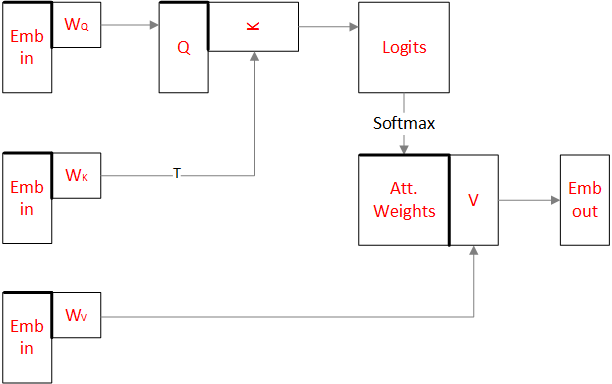

___
### <a id=21>Трансформеры</a>

`Трансформеры` — это архитектура нейронных сетей, использующая
-  механизм `multi-head self-attention` для обработки последовательностей, что позволяет эффективно учитывать весь контекст входных данных
    - $\boxed{MHSA = [SA_{head_1}, \dots ,SA_{head_n} ] \cdot W}$
        - Несколько голов получают выходные контекстные эмбеддинги, затем конкатенируются и умножаются на матрицу весов. Каждая голова обучается фокусироваться на разных аспектах входных данных
- `Позиционные эмбеддинги` вносят в исходный эмбеддинг порядковую информацию, т.к. трансформеры не обрабатывают данные последовательно.
    - $\boxed{x_i^` = x_i + p_i}$
        - $x_i$: исходный эмбеддинг
        - $x_i`$: эмбеддинг с информацией о позиции во всей последовательности
        - $p_i$: позиционный эмбеддинг
- `Энкодер`,  который кодирует входную последовательность в эмбеддинги. Использует:
    - multi-head self-attention
    - Позиционные эмбеддинги
    - Residual Connections
    - Полносвязный выходной слой
- `Декодер`, который генерирует выходную последовательность. Использует:
    - multi-head self-attention с `маскированием`, чтобы модель не могла видеть токены, которые будут предсказаны позже текущего шага (треугольная матрица)
    - Encoder-Decoder Attention: Декодер на `каждом` слое использует механизм внимания, чтобы взаимодействовать с `выходами` энкодера
    - Residual Connections
    - Полносвязный выходной слой c Softmax для предсказания вероятности следующего токена

| **Аспект**               | **RNN/LSTM/GRU**                                      | **Трансформеры**                                      | **Плюсы**                                                                 | **Минусы**                                                   |
|--------------------------|------------------------------------------------------|------------------------------------------------------|--------------------------------------------------------------------------|-------------------------------------------------------------|
| **Обработка последовательности** | Последовательная (по шагам).                        | Параллельная (вся последовательность сразу).         | Трансформеры быстрее обрабатывают последовательности благодаря параллельности. | У трансформеров выше требования к ресурсам из-за параллельности. |
| **Длина зависимостей**   | Трудности с длинными зависимостями (из-за исчезающих градиентов). | Легко захватывают зависимости между удаленными элементами. | Трансформеры справляются с глобальными зависимостями.       | RNN/LSTM/GRU не подходят для длинных последовательностей.   |
| **Вычислительная сложность** | Линейная по длине последовательности.                 | Квадратичная по длине (из-за self-attention).        | RNN/LSTM/GRU имеют меньшую вычислительную сложность.        | Self-Attention увеличивает сложность трансформеров на длинных последовательностях. |
| **Информация о порядке** | Автоматически учитывается через временную зависимость. | Требуются позиционные эмбеддинги.                    | RNN/LSTM/GRU учитывают порядок данных без дополнительных компонентов. | Трансформеры требуют позиционных эмбеддингов для учета порядка. |
| **Гибкость**             | Подходит только для последовательных данных.          | Универсальна, может работать с текстом, изображениями, графами и др. | Трансформеры применимы в широком диапазоне задач.          | RNN/LSTM/GRU ограничены последовательными задачами.         |
| **Параллелизация**       | Невозможна, так как обработка поэтапная.              | Легкая параллелизация, что ускоряет обучение.         | Трансформеры эффективны для обучения на больших данных.     | RNN/LSTM/GRU медленнее обучаются из-за последовательности.  |


___
### <a id=22>Подходы обработки длинных последовательностей в трансформерах</a>

**Проблема**:
- Стандартный self-attention имеет квадратичную сложность, что делает его слишком дорогим для длинных текстов
- Стандартные трансформеры ограничивают длину ввода фиксированным кол-вом токенов, что вызывает проблемы при обработке длинных текстов
- Обработка длинных последовательностей требует значительного объема памяти

**Подходы**:
- Разреженные механизмы внимания (`Sparse Attention`) уменьшает количество вычислений в self-attention, оставляя только самые важные взаимодействия между токенами:
    - `Longformer`: 
        - Каждый токен взаимодействует только с соседними токенами в пределах окна
        - Глобальное внимание применяется только к ключевым токенам
    - `BigBird`: 
        - Каждый токен взаимодействует только с соседними токенами в пределах окна
        - Глобальное внимание применяется только к ключевым токенам
        - Внимание между случайными токенами
- Разбиение длинного текста на более короткие `сегменты`
    - `Sliding Window Attention`:
            - Последовательность разбивается на перекрывающиеся фрагменты. Каждый фрагмент обрабатывается трансформером отдельно
            - Выходы соседних окон конкатенируются
- `Рекуррентные трансформеры`
     - `Transformer-XL` использует механизм рекуррентной памяти: 
        - Каждое окно текста сохраняет своё "скрытое состояние"
        - Следующее окно использует эту память, создавая связь между сегментами.

___
### <a id=23>Маскированное языковое моделирование (Masked LM).
</a>

`Маскированное языковое моделирование` — это подход к обучению языковых моделей, в котором определённые токены в тексте заменяются на специальный маркер (например, [MASK]), а задача модели заключается в `предсказании` этих `замаскированных` токенов на основе `контекста`.

Маскированное языковое моделирование используется для предобучения языковых моделей, таких как `BERT` и его производные.

**Алгоритм**: 
1. На этапе предобучения случайная часть токенов заменяется на специальный маркер [MASK]
2. Модель предсказывает токен, заменённый на [MASK], используя контекстные токены.
- Для каждого замаскированного слова модель генерирует вероятности для всех слов в `словаре`, выбирая наиболее `вероятное`
3. Рассчитывается значение функции потерь
- $\boxed{CE = - \sum^N logP(w_t|cont)}$,
     - $P(w_t|cont)$: вероятность предсказания замаскированного токена $w_t$ на основе контекста

**Особенности**:
- MLM позволяет учитывать как `левый`, так и `правый` контекст замаскированного слова
- Модель не учится генерировать текст слово за словом, а фокусируется на `восстановлении масок`
- MLM `плохо` подходит для `генеративных` задач, так как предсказывает только замаскированные токены, а не всю последовательность

___
### <a id=24>Архитектура BERT </a>

`BERT` (Bidirectional Encoder Representations from Transformers) — это архитектура трансформера, основной идеей BERT является использование `двунаправленного контекста` для обучения языковой модели.

Архитектура:
- BERT построен исключительно на `энкодерах` трансформера
- состоит из N слоев энкодера. Каждый слой включает:
    - Self-Attention
    - Полносвязные слои преобразуют промежуточные эмбеддинги
    - Residual Connections

Особенности:
- BERT анализирует весь контекст слева и справа одновременно
- Случайные токены `маскируются` и BERT обучается предсказывать `замаскированные` слова в предложении
- BERT использует метод `WordPiece`, который разбивает слова на `подслова`
- в начало последовательности добавляется специальный токен  [CLS] выходное представление которого используется для классификации
- между предложениями добавляется токен [SEP]

Задачи:
- Классификация текста
- Выделение сущностей (NER)
- Нахождение ответа на вопрос в тексте
- Улучшение качества переводов
- Суммаризация текста


___
### <a id=25>Seq2Seq модели </a>

`Seq2Seq` (Sequence-to-Sequence) — это архитектуры нейронных сетей, которые преобразуют одну последовательность в другую. Входная последовательность преобразуется в сжатое представление (контекст), которое затем используется для генерации выходной последовательности.

Состоит из: 
- Энкодера,  который кодирует входную последовательность в эмбеддинги
- Декодера, который генерирует выходную последовательность, На каждом шаге используя предыдущее предсказанное слово как вход

Типы Seq2Seq моделей:
- Seq2Seq с `RNN/LSTM/GRU`: энкодер и декодер основаны на RNN/LSTM/GRU сетях
- `Transformer`-based Seq2Seq: основанные на архитектуре трансформеров, исключают использование RNN
- `Гибридные` Seq2Seq модели: Комбинируют различные архитектуры для улучшения производительности

| **Модель**         | **Год разработки** | **Архитектурные особенности**                                                                                                           | **Применение**                                  |
|---------------------|--------------------|----------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------|
| **Google NMT**      | 2016               | - Основана на `LSTM с Attention`. <br> - 8-слойный энкодер и декодер. <br> - Первый масштабируемый подход к Seq2Seq задачам.              | Машинный перевод.                              |
| **Transformer**     | 2017               | - Первая архитектура, основанная на `self-attention`. <br> - Полностью исключены рекуррентные слои. <br> - Использует `позиционные эмбеддинги`. | Машинный перевод, резюмирование текста.        |
| **BERT**            | 2018               | - `Двунаправленный энкодер` трансформера. <br> - Использует задачи MLM и NSP для предобучения.                                            | Классификация текста, извлечение сущностей, вопросы-ответы. |
| **RoBERTa**         | 2019               | - `Оптимизированная версия BERT`: <br> + больше обучающих данных, <br> + токены маскируются на каждой итерации, <br> + оптимизированы гиперпараметры. <br> + Исключен Next Sentence Prediction, используется только Masked Language Modeling (MLM) при обучении.                                              | Анализ текста, классификация, извлечение информации. |
| **BART**            | 2019               | - Комбинация `BERT` (энкодер) и `GPT` (декодер). <br> - Двунаправленный энкодер и авто-регрессивный декодер.                                | Резюмирование, генерация текста, перевод.      |
| **T5**              | 2020               |<br> - Маскируются `несколько последовательных` токенов.                                              | Машинный перевод, вопросы-ответы, классификация. |
| **Pegasus**         | 2020               | - Специализирована для резюмирования текста. <br> - Предобучение через `маскирование ключевых предложений`.                               | Резюмирование текста.                          |
| **USER**            | 2021               | - Вектор для `всего предложения`, а не для каждого токена. <br> - Маскируются `несколько последовательных` токенов. <br> - `Исключен` Next Sentence Prediction     | Генерация текста, классификация, анализ тональности. |
| **Jina**            | 2022               | - `Мультимодальная` поддержка (текст + изображения) <br> - архитектура включает дополнительные модули для `быстрого доступа` к данным                                                   | Машинный перевод, поиск, генерация текста.     |
| **E5**              | 2023               | - Вектор для `всего предложения`, а не для каждого токена. <br> - `Исключен` Next Sentence Prediction <br> - Фокусируется на эффективной обработке `больших` текстовых данных.           | Машинный перевод, поиск, классификация.        |
| **Kalm**            | 2023               | - адаптирован для обработки длинных текстов с помощью `разреженного внимания`, где внимание уделяется только ключевым областям текста, а не всей последовательности. <br> - Оптимизирована для задач `генерации` и структурированного вывода. | Генерация текста, резюмирование, вопросы-ответы. |



___
### <a id=26>Transfer learning
</a>

`Transfer Learning` (перенос обучения) — это подход, при котором предварительно обученные языковые модели используются для адаптации к специфическим задачам, что значительно ускоряет обучение и улучшает результаты.

**Этапы**:
1. `Предобучение` (Pretraining): Модель обучается на большом корпусе текстов для изучения языковых закономерностей
    - Masked Language Modeling (MLM): предсказание замаскированных токенов (например, BERT).
    - Causal Language Modeling (CLM): предсказание следующего слова в последовательности (например, GPT).
2. `Дообучение` (Fine-tuning) Предобученная модель дообучается на данных для конкретной задачи, используя тренировочные данные, чтобы адаптировать модель к задаче.

| **Задача**                | **Описание**                                          | **Примеры моделей**                                          |
|---------------------------|------------------------------------------------------|-------------------------------------------------------------|
| **Классификация текста**   | Определение класса текста.                          | BERT, RoBERTa, DistilBERT, ALBERT, XLNet, ELECTRA, DeBERTa  |
| **Извлечение сущностей (NER)**| Выделение именованных сущностей в тексте.          | BERT, Flair, SpaCy, RoBERTa, LayoutLM                      |
| **Вопросы-ответы (QA)**    | Ответ на вопрос на основе текста.                   | BERT, ALBERT, T5, RoBERTa, mT5, GPT-3, MiniLM              |
| **Машинный перевод**       | Перевод текста с одного языка на другой.            | mBART, T5, MarianMT, M2M-100, XLM-R, NLLB                  |
| **Генерация текста**       | Создание текста на основе запроса.                  | GPT, GPT-2, GPT-3, T5, Bloom, OPT, GPT-Neo, LLaMA          |
| **Резюмирование текста**   | Создание краткого изложения длинного текста.        | BART, T5, Pegasus, Longformer, BigBird                     |
| **Анализ тональности**     | Определение эмоциональной окраски текста.           | DistilBERT, RoBERTa, BERT, XLNet, ELECTRA                  |
| **Извлечение отношений**   | Определение связей между сущностями в тексте.       | BERT, RoBERTa, LUKE, SpanBERT                              |
| **Мультиязычные задачи**   | Анализ текста на нескольких языках.                 | XLM, XLM-R, mBERT, mT5, M2M-100                            |
| **Поиск похожих документов**| Поиск текстов, близких по смыслу.                  | Sentence-BERT, USE (Universal Sentence Encoder), SimCSE     |
| **Автодополнение текста**  | Генерация текста на основе частичного ввода.        | GPT-3, GPT-Neo, Bloom, LLaMA, OPT                          |
| **Обнаружение фейков**     | Определение достоверности текста.                   | BERT, RoBERTa, XLNet, DeBERTa                              |


___
### <a id=27>Интерпретация предсказания глубоких моделей в задачах NLP
</a>

Объяснение предсказаний глубоких моделей в NLP помогает понять, какие части текста влияют на решение модели, что важно для оценки их работы.

- Визуализация матрицы внимания, которая показывает, как каждое слово взаимодействует с другими словами
    - `BERTViz`: Визуализация attention для моделей BERT
    - `Transformers Interpret`: Библиотека для интерпретации предсказаний моделей Hugging Face.

- Использование градиентов от выходного слоя модели для выделения важных токенов.
    - `Grad-CAM`

- Удаление или замена части текста (например, слова) и оценка, как это влияет на предсказание.
    - `LIME` 
    - `SHAP` 

- Визуализация эмбеддингов с помощью методов снижения размерности позволяет понять, как модель группирует слова в пространстве.
    - `t-SNE`
    - `UMAP`

___
### <a id=28>Метрики в задачах NLP
</a>

`Классификация текста`
- `Accuracy`: Доля правильно классифицированных объектов
    - $\boxed{Accuracy = \frac{\text{Кол-во верных предсказаний}}{\text{Кол-во всех объектов}}}$

- `Precision`: Доля корректно предсказанных объектов среди всех объектов, предсказанных как положительные
    - $\boxed{Precision = \frac{\text{TP}}{\text{TP+FP}}}$
- `Recall` : Доля корректно предсказанных положительных примеров среди всех положительных
    - $\boxed{Recall = \frac{\text{TP}}{\text{TP+FN}}}$
- `F1-Score` : Среднее гармоническое Precision и Recall
    - $\boxed{\text{F1} = \frac{2 \cdot Precision \cdot Recall}{Precision + Recall}}$

- `ROC-AUC`: Площадь под кривой зависимости истинно положительных (TPR) от ложно положительных предсказаний (FPR)

`Извлечение сущностей (NER)`
- `Precision`, `Recall`, `F1-Score`: Рассчитываются для каждого класса (сущности) или как средние метрики

- `Exact Match`: Доля правильно предсказанных сущностей (полное совпадение)

`Машинный перевод`
- `BLEU` (Bilingual Evaluation Understudy):  измеряет, насколько хорошо совпадают n-граммы между сгенерированным и эталонным текстом
    - $\boxed{BLEU = BP \cdot exp(\sum^N_{n=1} w_n \cdot log(p_n))}$,
        - $BP$: штраф за короткие переводы
        - $p_n$: доля совпадений `n-грамм`
        - $w_n$: веса для n-грамм

- `ROUGE`(Recall-Oriented Understudy for Gisting Evaluation): Измеряет `перекрытие` `n-грамм` между переведённым текстом и эталоном

- `METEOR` (Metric for Evaluation of Translation with Explicit ORdering): Учитывает `точное` совпадение `слов`, `синонимы` и `перестановки`.
- `TER` (Translation Edit Rate): Количество `изменений`, необходимых для преобразования перевода в эталонный текст.

`Резюмирование текста`
- `ROUGE`: Оценивает совпадение между сгенерированным резюме и эталонным
- `BLEU`: Применяется для оценки кратких резюме, аналогично машинному переводу
- `Content Selection`: Насколько хорошо модель выделяет ключевую информацию

`Генерация текста`
- `Perplexity`: Измеряет, насколько хорошо модель предсказывает последовательность слов. Низкое значение указывает на лучшее качество предсказаний

- `Distinct-N`: Измеряет разнообразие сгенерированного текста через уникальные n-граммы
    - $\boxed{\text{Distinct-N} = \frac{\text{Кол-во уникальных n-грамм}}{\text{Кол-во всех n-грамм}}}$

`Поиск вопросов-ответов (QA)`
- `Exact Match (EM)`: Доля предсказаний, которые точно совпадают с эталоном

- `Mean Reciprocal Rank (MRR)`: Оценивает, насколько высоко правильный ответ расположен в списке предложенных
    - $\boxed{\text{MRR} = \frac{1}{N}\sum^N_{i=1}\frac{ 1}{rank_i}}$